# **Retail Sales Analysis modules**

## Objectives

* Create a set of modules to support the analysis of the Retail Sales Data set from Kaggle to act as demonstration of skills

## Inputs

* Data will be pulled using the Kaggle API.

## Outputs

* Multiple python modules that can be loaded and resused to support re-use of analytics

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

Hard code working directory to relative root directory of workbook.

In [2]:
import os
os.chdir('/workspace/RetailSalesRework')
print("You set a new current directory")

You set a new current directory


In [59]:
## Modules and Extensions imported
import pandas as pd
import os
import math
import numpy as np
from datetime import timedelta, date
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import matplotlib.ticker as ticker

# Data Acquisition

Load data using Kagglehub api - the user will need a Kaggle account and a kaggle api code.  Both of the can be obtained from [Kaggle.com](https://Kaggle.com/).  This project will be using the [Retail Data Anlaytics DataSet](https://www.kaggle.com/datasets/manjeetsingh/retaildataset)

In [4]:
## Setup Kagglehub and login
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [5]:
## load Retail Data Set using Kagglehub
kagglehub.dataset_download("manjeetsingh/retaildataset")

100%|██████████| 3.11M/3.11M [00:00<00:00, 4.60MB/s]

Extracting files...


'/home/gitpod/.cache/kagglehub/datasets/manjeetsingh/retaildataset/versions/2'

In [6]:
## List of files in folder
os.listdir('/home/gitpod/.cache/kagglehub/datasets/manjeetsingh/retaildataset/versions/2/')

['Features data set.csv', 'sales data-set.csv', 'stores data-set.csv']

In [13]:
## Load data sets
Features_df = pd.read_csv('/home/gitpod/.cache/kagglehub/datasets/manjeetsingh/retaildataset/versions/2/Features data set.csv')
Stores_df = pd.read_csv('/home/gitpod/.cache/kagglehub/datasets/manjeetsingh/retaildataset/versions/2/stores data-set.csv')
Sales_df = pd.read_csv('/home/gitpod/.cache/kagglehub/datasets/manjeetsingh/retaildataset/versions/2/sales data-set.csv')
## Merge sales_df and Stores_df on Store id - change data type of Date to Date, Store to Object and Dept to Object,
Sales_df = pd.merge(Sales_df, Stores_df, how='left', on='Store')
Sales_df['Date'] = pd.to_datetime(Sales_df['Date'], format='%d/%m/%Y')
Sales_df['Store'] = Sales_df['Store'].astype(object)
Sales_df['Dept'] = Sales_df['Dept'].astype(object)

## Clean up Features_df then create store level summary
Features_df['Date'] = pd.to_datetime(Features_df['Date'], format='%d/%m/%Y')
# Change date to date format and create year/month and week fields and YearMonth YearWeek
# Append Year column
Sales_df['SalesYear'] = round(Sales_df['Date'].dt.year)
# Append Month column 
Sales_df['SalesMonth'] = round(Sales_df['Date'].dt.month)
# Append Week column
Sales_df['SalesWeek'] = round(Sales_df['Date'].dt.week)
# Create YearMonth Column
Sales_df['SalesYearMonth'] = round(Sales_df['SalesYear']*100 +Sales_df['SalesMonth'])
# Create YearWeek Column
Sales_df['SalesYearWeek'] = round(Sales_df['SalesYear']*100 +Sales_df['SalesWeek'])
# Replace NaN in MarkDown as 0
Features_df['MarkDown1'] = Features_df['MarkDown1'].fillna(0)
Features_df['MarkDown2'] = Features_df['MarkDown2'].fillna(0)
Features_df['MarkDown3'] = Features_df['MarkDown3'].fillna(0)
Features_df['MarkDown4'] = Features_df['MarkDown4'].fillna(0)
Features_df['MarkDown5'] = Features_df['MarkDown5'].fillna(0)
Features_df['MarkDownTotal']= Features_df['MarkDown1']+Features_df['MarkDown2']+Features_df['MarkDown3']+Features_df['MarkDown4']+Features_df['MarkDown5']
Features_df['MarkDownData']= Features_df['MarkDownTotal']>0
# Use fillna forward on Unemployment and CPI
Features_df['CPI']=Features_df['CPI'].fillna(method='ffill')
Features_df['Unemployment']=Features_df['Unemployment'].fillna(method='ffill')

/tmp/ipykernel_1707/565662928.py:19: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Sales_df['SalesWeek'] = round(Sales_df['Date'].dt.week)


In [10]:
Sales_df_summary = Sales_df.groupby(['Type','IsHoliday']).Weekly_Sales.agg(['mean', 'std'])
Sales_df_summary

mean           std
Type IsHoliday                            
A    False      20008.746759  26107.047984
     True       21297.517824  30264.671745
B    False      12153.067752  16558.647788
     True       13346.164062  24128.821137
C    False       9518.528116  15975.155545
     True        9532.963131  16123.779035

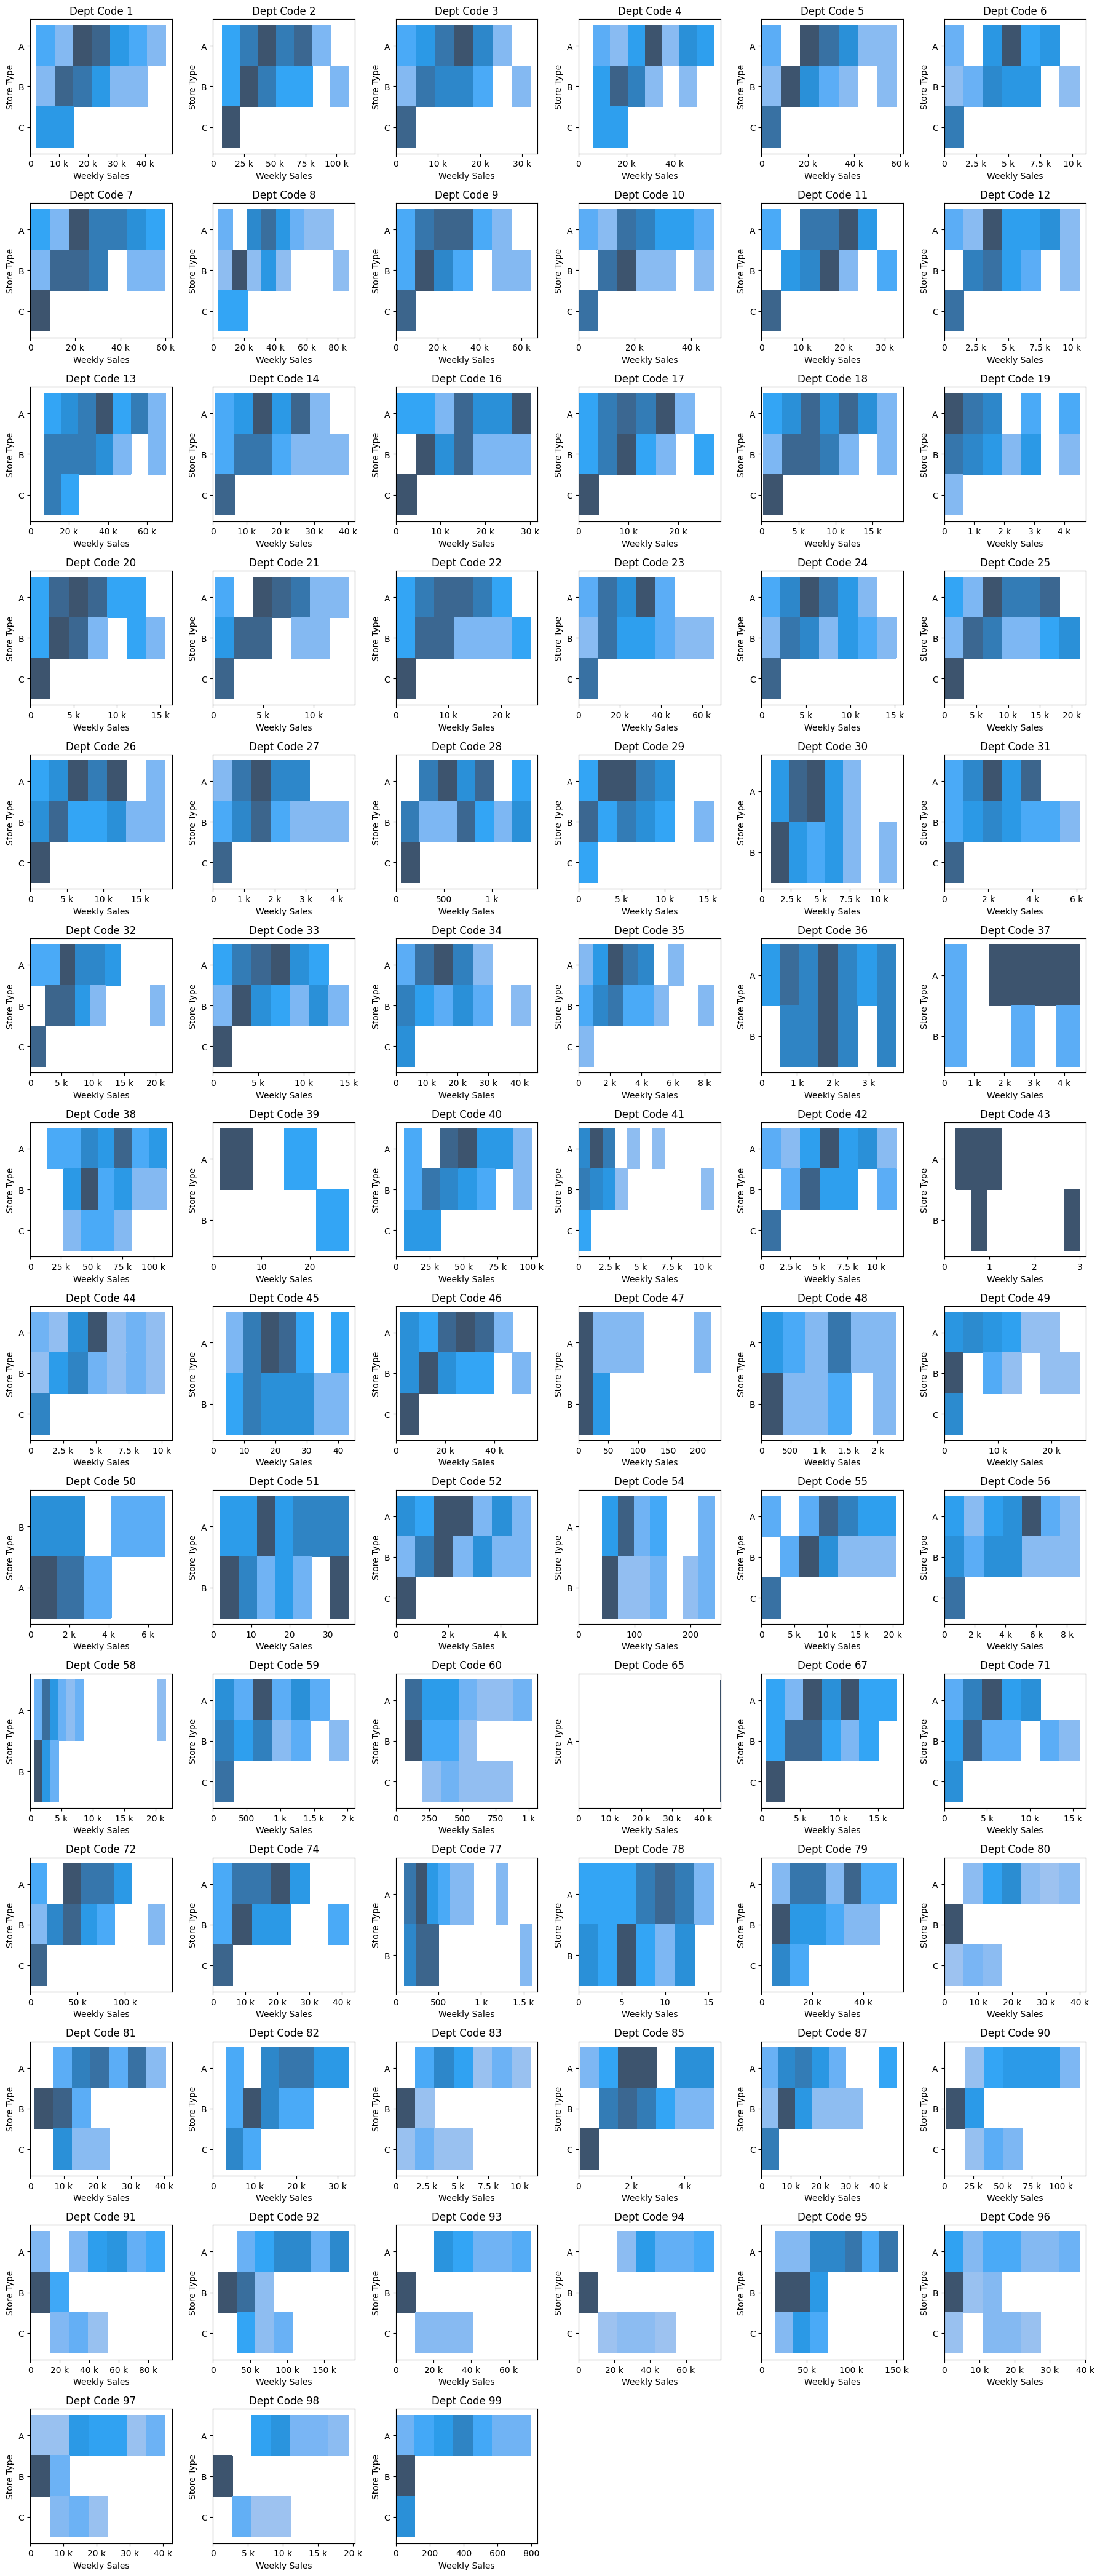

In [27]:
# Get unique values in Dept
unique_groups = Sales_df['Dept'].drop_duplicates().sort_values()

# Number of plots per row
plots_per_row = 6

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in Dept and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = Sales_df[Sales_df['Dept'] == group].groupby(['Store', 'Type'])['Weekly_Sales'].mean().reset_index()

    # Create a scatterplot for the current group
    sns.histplot(
        data=group_data,
        x='Weekly_Sales',
        y='Type',
        ax=axes[idx],  # Pass the specific subplot axis
        palette='viridis'
    )

    # Add labels and title
    axes[idx].set_title(f'Dept Code {group}')
    axes[idx].set_xlabel('Weekly Sales')
    axes[idx].set_ylabel('Store Type')
    axes[idx].set_xlim(0,)
    axes[idx].xaxis.set_major_formatter(EngFormatter())  # Format x-axis for better readability

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [23]:
Sales_df.query('Dept == 65').describe()
print(Sales_df.query('Dept == 65'))

       Store Dept       Date  Weekly_Sales  IsHoliday Type    Size  SalesYear  \
327716    34   65 2010-02-05      41057.25      False    A  158114       2010   
327717    34   65 2010-02-12      39799.36       True    A  158114       2010   
327718    34   65 2010-02-19      42908.44      False    A  158114       2010   
327719    34   65 2010-02-26      40515.35      False    A  158114       2010   
327720    34   65 2010-03-05      49353.20      False    A  158114       2010   
...      ...  ...        ...           ...        ...  ...     ...        ...   
327854    34   65 2012-09-28      48106.24      False    A  158114       2012   
327855    34   65 2012-10-05      48631.79      False    A  158114       2012   
327856    34   65 2012-10-12      45354.87      False    A  158114       2012   
327857    34   65 2012-10-19      46625.22      False    A  158114       2012   
327858    34   65 2012-10-26      41457.76      False    A  158114       2012   

        SalesMonth  SalesWe

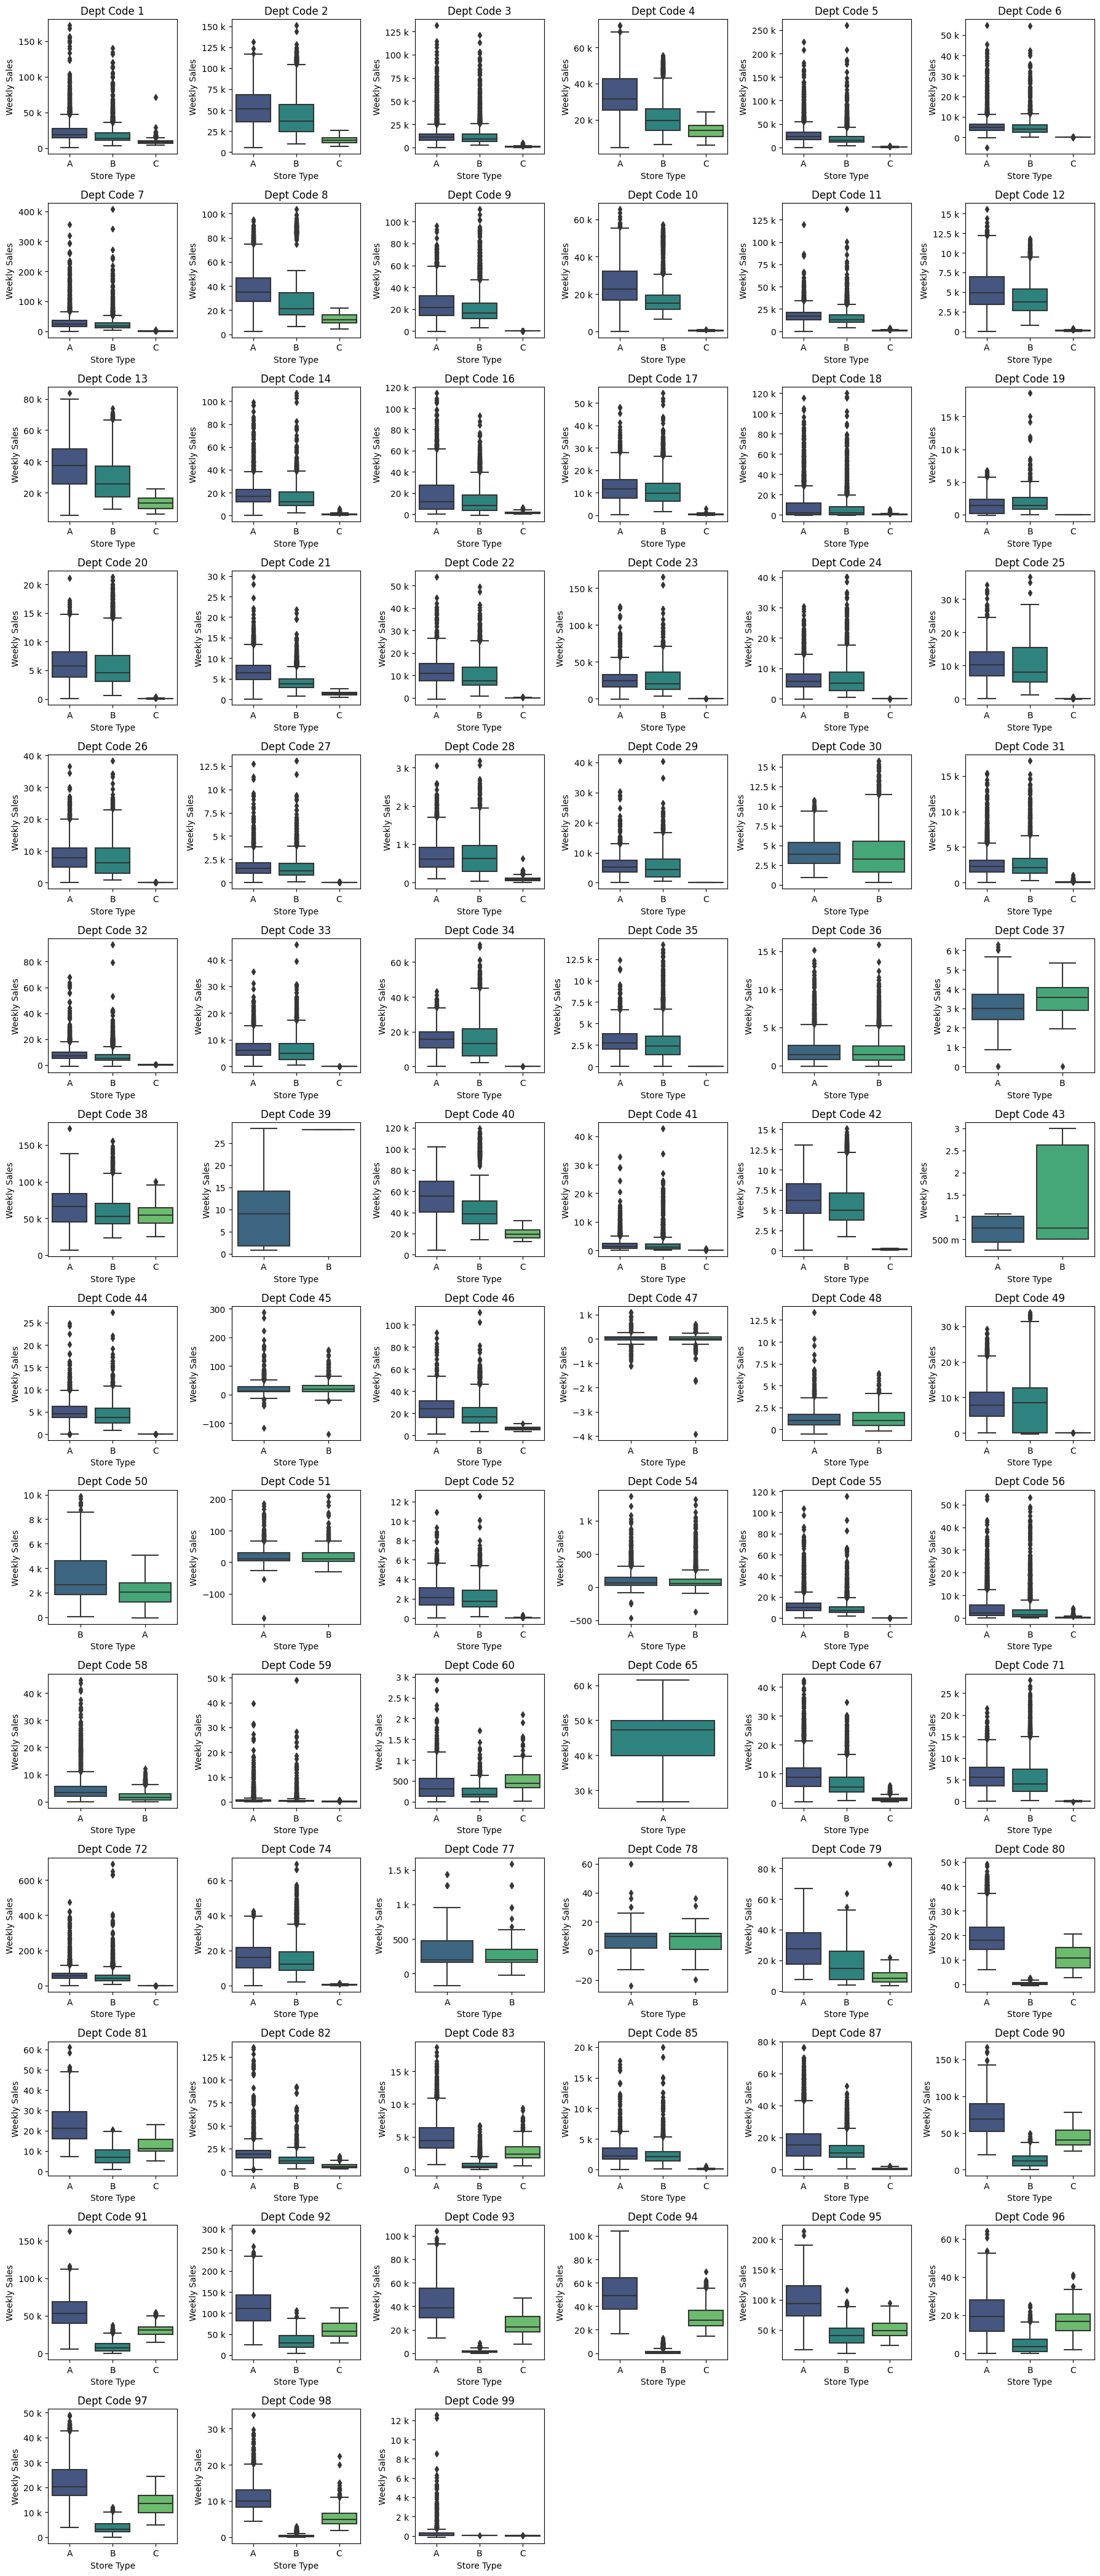

In [ ]:
# Get unique values in Dept
unique_groups = Sales_df['Dept'].drop_duplicates().sort_values()
# Number of plots per row
plots_per_row = 6

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each unique value in Dept and corresponding axes
for idx, group in enumerate(unique_groups):
    # Filter data for the current group
    group_data = Sales_df.loc[Sales_df['Dept'] == group, ['Weekly_Sales', 'Type']].dropna()
    
    # Create a boxplot for the current group
    sns.boxplot(
        data=group_data,
        x='Type',
        y='Weekly_Sales',
        ax=axes[idx],
        palette='viridis'
    )
    
    # Add labels and title
    axes[idx].set_title(f'Dept Code {group}')
    axes[idx].set_ylabel('Weekly Sales')
    axes[idx].set_xlabel('Store Type')
    axes[idx].yaxis.set_major_formatter(ticker.EngFormatter())
    

# Hide any unused axes
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [48]:
Sales_df_plot = Sales_df.groupby(['Date', 'Dept',  'Type'])['Weekly_Sales'].mean().dropna().reindex()
Sales_df_plot

Date        Dept  Type
2010-02-05  1     A       23828.249091
                  B       17980.224706
                  C        8658.018333
            2     A       52965.180455
                  B       43991.040000
                              ...     
2012-10-26  97    C       12803.206667
            98    A       11721.011364
                  B         522.116429
                  C        6216.233333
            99    A          13.963333
Name: Weekly_Sales, Length: 29733, dtype: float64

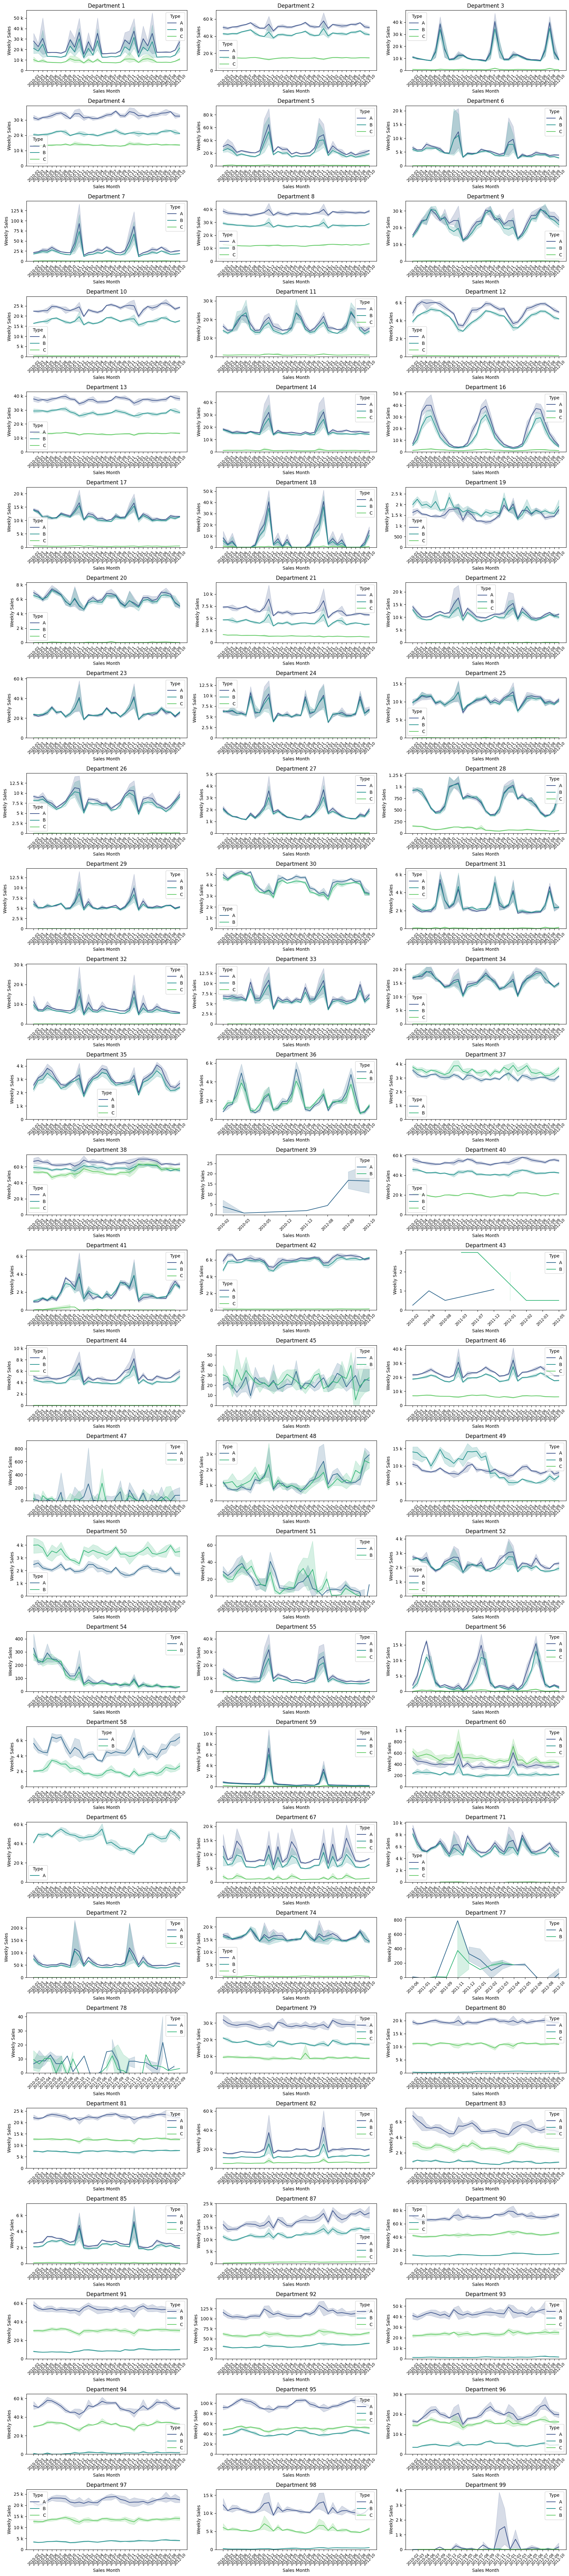

In [63]:
# Summarize data by month, department, and type
Sales_df_plot = (
    Sales_df.groupby(['Date', 'Dept', 'Type'])['Weekly_Sales']
    .mean()
    .reset_index()
    .sort_values(by=['Dept', 'Date'])
)

# Get unique department values
unique_groups = Sales_df_plot['Dept'].drop_duplicates().sort_values()

# Number of plots per row
plots_per_row = 3

# Calculate the required number of rows
num_rows = math.ceil(len(unique_groups) / plots_per_row)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(18, 3 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Loop through each department and create a subplot
for idx, group in enumerate(unique_groups):
    # Filter data for the current department
    group_data = Sales_df_plot[Sales_df_plot['Dept'] == group].copy()
    group_data['SalesYearMonth'] = group_data['Date'].dt.to_period('M').astype(str)  # Convert to "YYYY-MM" format
    
    # Lineplot for the current department
    sns.lineplot(
        data=group_data,
        x='SalesYearMonth',
        y='Weekly_Sales',
        hue='Type',
        ax=axes[idx],
        palette='viridis'
    )
    
    # Format labels and titles
    axes[idx].set_title(f'Department {group}')
    axes[idx].set_ylabel('Weekly Sales')
    axes[idx].set_xlabel('Sales Month')
    axes[idx].tick_params(axis='x', rotation=45, labelsize='small')  # Rotate x-axis labels
    axes[idx].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[idx].set_ylim(0,)


# Hide unused subplots
for ax in axes[len(unique_groups):]:
    ax.set_visible(False)

# Adjust layout and display the plot

plt.tight_layout()
plt.show()


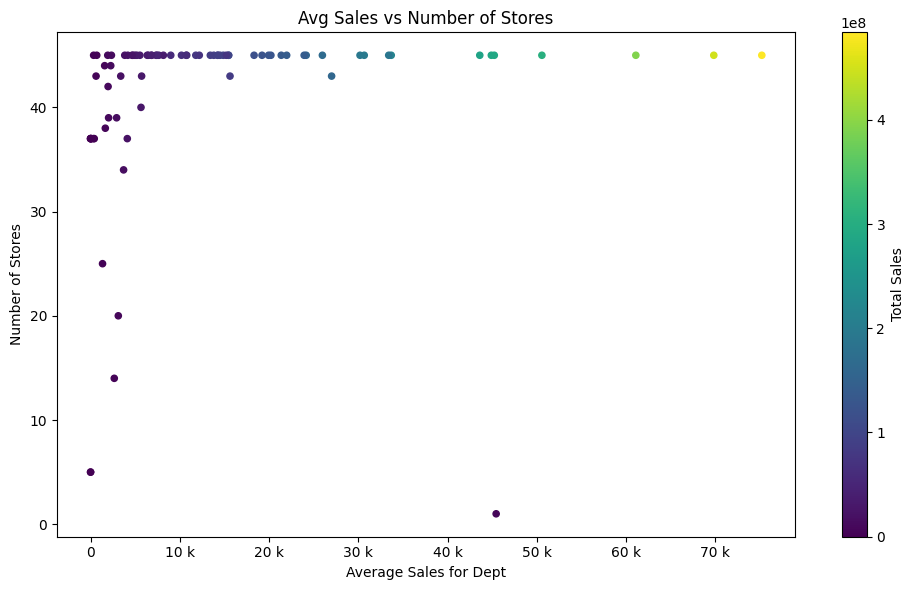

In [52]:


# Group and summarize data
Departments_summary = Sales_df.groupby('Dept').agg({
    "Weekly_Sales": ['sum', 'mean', 'min', 'max', 'std', 'var'],
    "Store": pd.Series.nunique
}).reset_index()

# Flatten the MultiIndex columns
Departments_summary.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in Departments_summary.columns]

# Rename columns for clarity
Departments_summary = Departments_summary.rename(columns={
    'Weekly_Sales_sum': 'Total Sales',
    'Weekly_Sales_mean': 'Average Sales',
    'Weekly_Sales_min': 'Minimum Sales',
    'Weekly_Sales_max': 'Maximum Sales',
    'Weekly_Sales_std': 'Sales Std Dev',
    'Weekly_Sales_var': 'Sales Variance',
    'Store_nunique': 'Unique Stores'
})

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

scatter = Departments_summary.plot(
    kind='scatter',
    x='Average Sales',
    y='Unique Stores',
    c='Total Sales',
    colormap='viridis',
    ax=ax
)

# Add titles and labels
ax.set_title('Avg Sales vs Number of Stores')
ax.set_ylabel('Number of Stores')
ax.set_xlabel('Average Sales for Dept')

# Format axes
ax.xaxis.set_major_formatter(ticker.EngFormatter())
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# Show plot
plt.tight_layout()
plt.show()


---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.